In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

In [142]:
df_no_encoded = pd.read_csv('/Users/arnav/Desktop/MachineLearning/CSE558-DSc-Project/Data_Preproc_NoEncoding.csv')

df_no_encoded.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [143]:
df_no_encoded.nunique()

cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
dtype: int64

In [144]:
# Check Unique Values from the Column 'habitat'
df_no_encoded['habitat'].unique()

array(['g', 'p', 'e', 'l', 'f', 'm', 'r', 'z'], dtype=object)

In [145]:
# Open the labels file
df_labels = pd.read_csv('/Users/arnav/Desktop/MachineLearning/CSE558-DSc-Project/Labels.csv')

df_labels.head()

,class
0,p
1,p
2,p
3,p
4,p


### $\chi^{2}$ test for Goodness of Fit

- We pick two categorical variables i.e. the Habitat of the Mushroom and the Class of the Mushroom (i.e. Poisonous or Edible)
- We perform $\chi^{2}$ test on these two categorical variables to determine if the two are independent or not.
- We will visualise these two variables together now

In [146]:
contingency_table = pd.crosstab(df_no_encoded['habitat'], 
 df_labels['class'])

contingency_table

class,e,p
ring-type,,
e,1230,1583
f,21533,26879
g,1232,725
l,877,555
m,353,0
p,753,717
r,914,820
z,289,2609


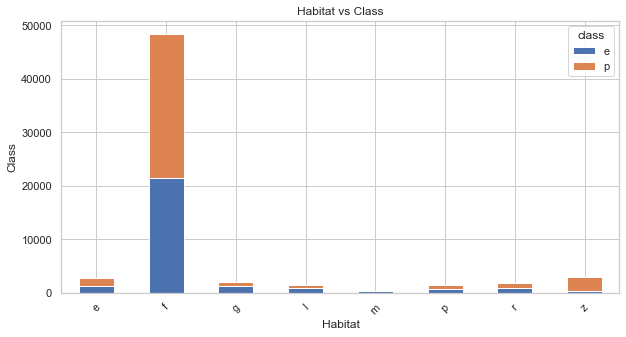

In [147]:
# Visualize the CrossTab using a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10,5))

plt.title('Habitat vs Class')
plt.xlabel('Habitat')
plt.ylabel('Class')
plt.xticks(rotation=45)
plt.show()

- We now define our null and alternate hypothesis tests

1. Null Hypothesis: 

$H_{0}$ : Class and Habitat are Independent of each other

2. Alternate Hypothesis: 

$H_{1}$ : Class and Habitat are Dependent on each other

In [148]:
# Calculate observed frequencies
O = contingency_table.values

# Calculate expected frequencies
n = np.sum(O)
row_totals = np.sum(O, axis=1)
col_totals = np.sum(O, axis=0)

# Calculate expected frequencies for each cell
E = np.outer(row_totals, col_totals) / n

print("Expected Frequencies:")
print(E)

Expected Frequencies:
[[ 1252.02890173  1560.97109827]
 [21547.53757225 26864.46242775]
 [  871.03468208  1085.96531792]
 [  637.36416185   794.63583815]
 [  157.11560694   195.88439306]
 [  654.27745665   815.72254335]
 [  771.78034682   962.21965318]
 [ 1289.86127168  1608.13872832]]


In [149]:
# Calculate the chi-squared statistic
chi2_stat = 0
for i in range(O.shape[0]):
    for j in range(O.shape[1]):
        chi2_stat += ((O[i,j] - E[i,j]) ** 2) / E[i,j]

# Calculate the p-value
dof = (O.shape[0] - 1) * (O.shape[1] - 1)
p_value = 1 - chi2.cdf(chi2_stat, dof)

print('Chi-Squared Statistic:', chi2_stat)
print('Degrees of Freedom:', dof)
print('P-Value:', p_value)

Chi-Squared Statistic: 2346.3473733966002
Degrees of Freedom: 7
P-Value: 0.0


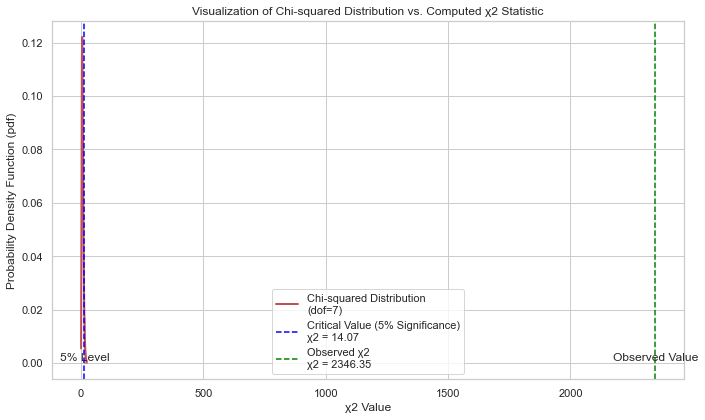

In [150]:
# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Values for x-axis
x = np.linspace(chi2.ppf(0.001, dof), chi2.ppf(0.999, dof), 1000)

# Plot chi-squared distribution
plt.plot(x, chi2.pdf(x, dof), 'r-', lw=2, label=f'Chi-squared Distribution\n(dof={dof})')

# Highlight the region beyond the critical value for 5% significance
critical_value = chi2.ppf(0.95, dof)
plt.fill_between(x, chi2.pdf(x, dof), where=(x > critical_value), color="red", alpha=0.3)

# Annotate the 5% critical value
plt.axvline(critical_value, color='blue', linestyle='--', label=f'Critical Value (5% Significance)\nχ2 = {critical_value:.2f}')
plt.text(critical_value, 0, '5% Level', horizontalalignment='center', verticalalignment='bottom')

# Annotate the computed chi2 statistic
plt.axvline(chi2_stat, color='green', linestyle='--', label=f'Observed χ2\nχ2 = {chi2_stat:.2f}')
plt.text(chi2_stat, 0, 'Observed Value', horizontalalignment='center', verticalalignment='bottom')

# Add title and labels
plt.title("Visualization of Chi-squared Distribution vs. Computed χ2 Statistic")
plt.xlabel("χ2 Value")
plt.ylabel("Probability Density Function (pdf)")
plt.legend()

plt.tight_layout()
plt.show()


- This suggest with a very strong statistical significance to reject our Null Hypothesis

- Therefore from this test, we can conclude that the two categorical variables are dependent on each other

### Validation Experiments

1. We check the Expected Frequency Table for any frequency less than 5:

In [151]:
count_low_freq = (E < 5).sum()
total_cells = E.size

print(f"Cells with expected frequency < 5: {count_low_freq}/{total_cells}")

Cells with expected frequency < 5: 0/16


2. Boostrapping to Test Consistency

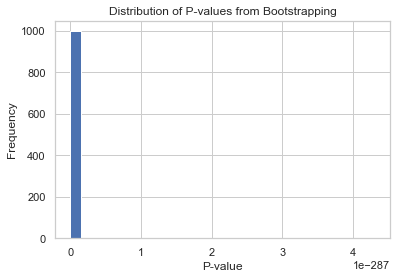

In [152]:
from scipy.stats import chi2_contingency

# Create a dataframe with the labels
df_comp = pd.concat([df_no_encoded, df_labels], axis=1)

n_iterations = 1000
p_values_bootstrap = []

for _ in range(n_iterations):
    bootstrap_sample = df_comp.sample(frac=0.8, replace=True)
    bootstrap_contingency = pd.crosstab(bootstrap_sample['habitat'], bootstrap_sample['class'])
    
    _, p_bootstrap, _, _ = chi2_contingency(bootstrap_contingency)
    p_values_bootstrap.append(p_bootstrap)

# Now you can visualize the distribution of p-values if desired
plt.hist(p_values_bootstrap, bins=30)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-values from Bootstrapping')
plt.show()
